<a href="https://colab.research.google.com/github/purosh96/ML/blob/main/DTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving dm.csv to dm.csv


In [3]:
import pandas as pd
data = pd.read_csv("dm.csv")
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [4]:
X = data.drop(['Cust_Id','AmountSpent'],axis=1)

In [5]:
X = pd.get_dummies(X)

In [6]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [12]:
y = data["AmountSpent"]

In [13]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [64]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=7)
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [65]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending = False).head()

Salary            0.601973
Catalogs          0.170088
History_Medium    0.086973
History_Low       0.061939
Location_Close    0.028576
dtype: float64

In [66]:
y_pred = reg.predict(X_test)

In [67]:
reg.score(X_test,y_test)

0.732152194298938

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)
r2_score(y_test,y_pred)

0.7225155467141299

In [69]:
import matplotlib.pyplot as plt

In [70]:
from sklearn import tree

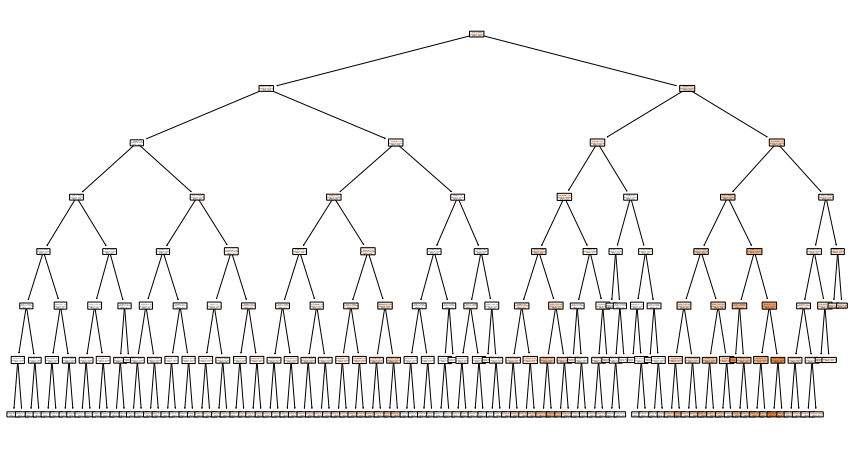

In [71]:
plt.figure(figsize=(15,8))
tree.plot_tree(reg,feature_names=X.columns,filled=True,precision=2,proportion=True,rounded=True)
plt.show()